In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from utils import *
import tensorflow as tf

from cyclegan import CycleGAN


In [3]:
# Ensure TensorFlow only uses the GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Set GPU as default
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        print("Using GPU")
    except RuntimeError as e:
        print(e)

Using GPU


In [4]:
gan = CycleGAN()
gan.load_weights('saved_weights')

Weights loaded from saved_weights


In [5]:
BATCH_SIZE = 16

trainA_path = os.path.join(PATH, 'train_a/*.jpg')
trainB_path = os.path.join(PATH, 'train_b/*.jpg')

trainA = tf.data.Dataset.list_files(trainA_path)
trainB = tf.data.Dataset.list_files(trainB_path)

trainA = trainA.map(load_image).shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)
trainB = trainB.map(load_image).shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

In [6]:
gan.train(trainA, trainB, epochs=1, load_from=None, save_to=None)

Epoch 1/1


Training Epoch 1: 100%|##########| 11/11 [00:24<00:00,  2.26s/batch]

Epoch 1 completed.


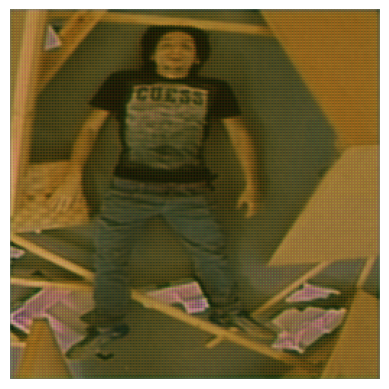

In [9]:
result = gan.transform_to_ocean('./images/test.png')